In [39]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib.colors import LinearSegmentedColormap
#import seaborn as sns

Plot heatmaps of each allele over time. One horizontal line in the heatmap represents one patch's alleles over time with the opacity of the line defined by the allele count. The overall map comes from 50 stacked horizontal line. One heatmap is made for each allele (eg W, R, H, and B) and one is made with all allele maps overlain.

In [2]:
# Columns is a list of lists describing the number of times each one indexed column should be counted for this allele
# eg [[1, 1, 2], [2, 3, 3]] if the given genotypes are WW, WR, and RR
# alleleNames is a list of the allele names for use as column titles eg ["W", "R"]
# startCol is the first column in the csv which lists genotypes, one indexed. 
# Column 1 in the column argument corresponds to startCol in the table.
# returns 1 summed list for each list in columns, each containing the specified sum: eg  col 1 + col 1 + col 2        
def alleleCounts(csvFileName, columns, alleleNames, startCol = 3):
    data = np.genfromtxt(csvFileName, skip_header=1, delimiter=",")
    res = df[['Time']]
    for i in range(len(columns)):
        # summed_col contains sum of counts for one allele, such as W
        summed_col = np.zeros_like(data[:,0])
        for index in columns[i]:
            # subtract 2 because index and start col are 1 indexed
            summed_col += data[:,index+startCol - 2]
        allele = alleleNames[i]
        res.insert(i + startCol - 1, alleleNames[i], summed_col)
    return res


In [3]:
csvFileName = "E_090_075_002_010/ADM_Mean_Patch0000.csv"
df = pd.read_csv(csvFileName)
display(df.head())
counts = alleleCounts(csvFileName, [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'], 2)
display(counts.head())

,Time,WW,WH,WR,WB,HH,HR,HB,RR,RB,BB
0,1,6.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,6.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,6.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Time,W,H,R,B
0,1,13.46,0.0,0.0,0.0
1,2,13.34,0.0,0.0,0.0
2,3,12.96,0.0,0.0,0.0
3,4,13.02,0.0,0.0,0.0
4,5,12.80,0.0,0.0,0.0


In [4]:
# AF1 = females, ADM = males: should take in whole folder and choose whether to plot male or female CSV files
def allCounts(csvPath, columns, alleleName, female=True):
    if female:
        files = glob.glob(csvPath + 'AF1*.csv')
    else:
        files = glob.glob(csvPath + 'ADM*.csv')
    res = df[['Time']]
    for i in range(len(files)):
        count_df = alleleCounts(files[i], [columns], [alleleName], 2)
        res.insert(i + 1, alleleName + str(i), (count_df[alleleName]).copy())
    return res

In [5]:
def plotIndividualAlleles(csvPath, columns, alleleNames, female=True):
    cmaps = ["BuPu_r", "GnBu_r", "PuBu_r", "PuBuGn_r"]
    for i in range(len(alleleNames)):
        counts = allCounts(csvPath, columns[i], alleleNames[i], female)
        counts = counts.set_index("Time").T
        fig, ax = plt.subplots(figsize=(20, 5))
        ax.set_ylabel(alleleNames[i])
        im = ax.imshow(counts, cmap=plt.get_cmap(cmaps[i]))

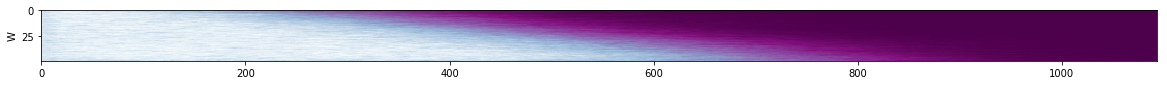

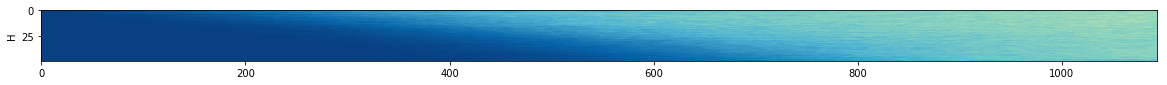

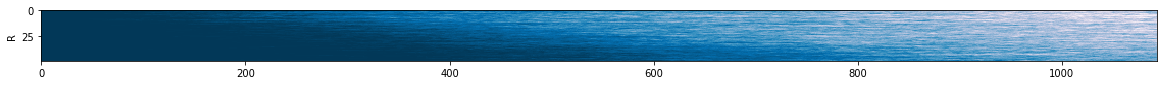

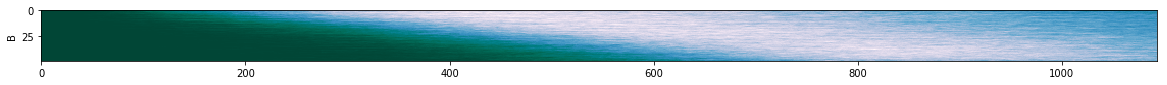

In [6]:
plotIndividualAlleles("E_090_075_002_010/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])

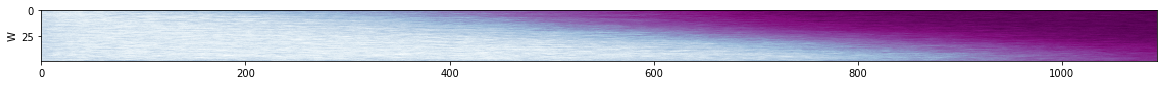

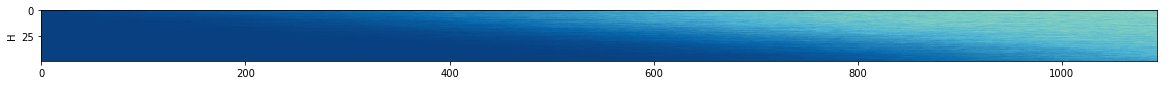

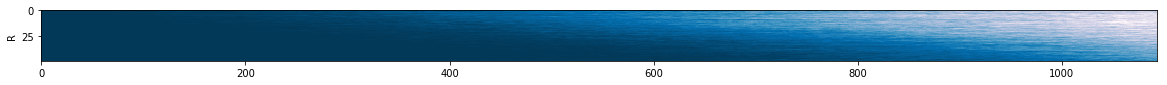

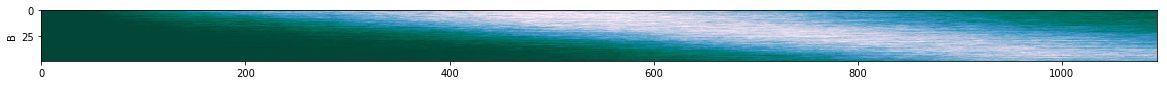

In [7]:
plotIndividualAlleles("E_070_075_006_035/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])

Time,1,2,3,4,5,6,7,8,9,10,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
W0,13.76,13.74,13.66,13.98,14.20,14.16,13.82,13.52,13.34,13.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1,13.42,13.50,13.54,13.64,13.46,13.64,14.02,14.32,14.32,14.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W2,13.86,13.84,13.76,13.72,13.96,14.20,14.42,14.46,14.74,14.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W3,14.10,13.96,13.56,13.44,13.54,13.46,13.28,13.42,13.32,13.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W4,14.04,14.16,13.82,13.82,14.28,14.28,14.46,14.36,14.88,15.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


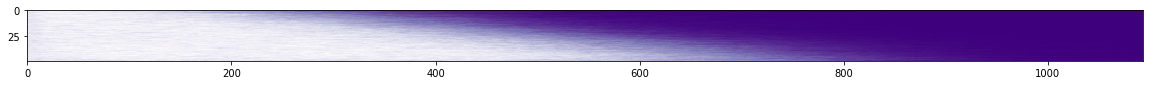

In [8]:
counts = allCounts("E_090_075_002_010/", [1, 1, 2, 3, 4], "W")
counts = counts.set_index("Time").T
display(counts.head())
fig, ax = plt.subplots(figsize=(20, 5))
im = ax.imshow(counts, cmap=plt.get_cmap("Purples_r"))

Time,1,2,3,4,5,6,7,8,9,10,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
H0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.60,10.97,10.91,11.08,11.00,10.73,10.76,10.65,10.99,11.15
H1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.32,11.22,10.89,10.77,10.52,10.71,11.07,10.98,11.02,10.93
H2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.19,11.27,11.58,11.99,11.76,11.37,11.22,11.00,10.75,10.59
H3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.67,11.39,11.41,10.89,10.95,10.88,11.19,11.33,11.18,11.06
H4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.26,11.04,11.36,11.16,11.32,11.20,11.57,11.71,11.79,11.35


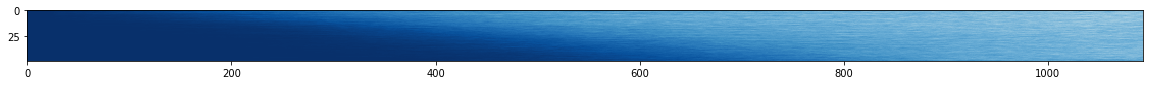

In [9]:
counts = allCounts("E_090_075_002_010/", [2, 5, 5, 6, 7], "H")
counts = counts.set_index("Time").T
display(counts.head())
fig, ax = plt.subplots(figsize=(20, 5))
im = ax.imshow(counts, cmap=plt.get_cmap("Blues_r"))

Time,1,2,3,4,5,6,7,8,9,10,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
R0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.07,1.09,1.05,1.01,0.98,1.03,0.97,1.02,1.02,1.06
R1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.97,1.06,1.11,1.15,1.10,1.05,1.12,1.14,1.27,1.23
R2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.02,0.93,0.90,0.88,0.90,1.01,1.02,0.99,1.03,1.04
R3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.87,0.86,0.92,0.90,1.02,0.95,0.95,0.94,0.91,0.88
R4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.34,1.20,1.05,1.02,1.08,1.08,1.09,1.06,1.04,0.99


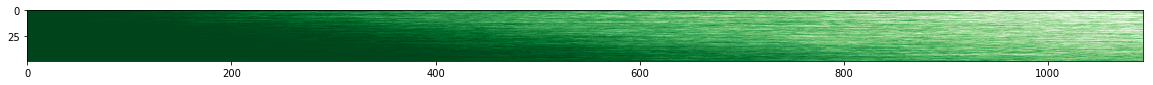

In [10]:
counts = allCounts("E_090_075_002_010/", [3, 6, 8, 8, 9], "R")
counts = counts.set_index("Time").T
display(counts.head())
fig, ax = plt.subplots(figsize=(20, 5))
im = ax.imshow(counts, cmap=plt.get_cmap("Greens_r"))

Note that we should transition to using colormaps which vary in opacity rather than color so that they overlay better

In [47]:

counts = allCounts("E_090_075_002_010/", [3, 6, 8, 8, 9], "R")
counts = counts.set_index("Time").T
counts1 = allCounts("E_090_075_002_010/", [1, 1, 2, 3, 4], "W")
counts1 = counts1.set_index("Time").T
counts2 = allCounts("E_090_075_002_010/", [2, 5, 5, 6, 7], "H")
counts2 = counts2.set_index("Time").T

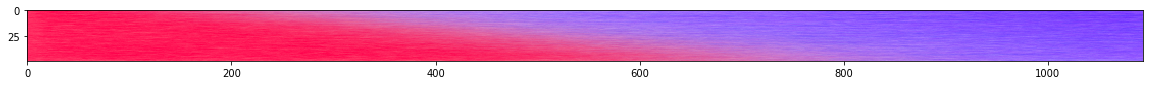

In [51]:
cdict1 = {'red':   ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.3, 0.3)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

red1 = LinearSegmentedColormap('Red1', cdict1)

cdict2 = {'red':   ((0.0, 0.3, 0.3),
                   (1.0, 0.3, 0.3)),

         'green': ((0.0, 0.5, 0.5),
                   (1.0, 0.5, 0.5)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

blue1 = LinearSegmentedColormap('Blue1', cdict2)


cdict3 = {'red':   ((0.0, 0.5, 0.5),
                   (1.0, 0.5, 0.5)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

purple1 = LinearSegmentedColormap('Purple1', cdict3)


cdict4 = {'red':   ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

pink1 = LinearSegmentedColormap('Pink1', cdict3)


fig= plt.figure(figsize=(20, 5))
plt.imshow(counts, cmap=blue1)
plt.imshow(counts1, cmap=red1)
plt.imshow(counts2, cmap=purple1)
